<a href="https://colab.research.google.com/github/shreyas3011/Sentiment_and_Trading_analysis/blob/main/Sentiment_and_Trading_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Data Preprocessing**

In [2]:
sentiment=pd.read_csv("fear_greed_index.csv")
trader=pd.read_csv("historical_data.csv")

In [3]:
sentiment.head()

,timestamp,value,classification,date,sentiment_label,month,year,day_of_week
0,1517463000,30,Fear,2018-02-01,1,2,2018,Thursday
1,1517549400,15,Extreme Fear,2018-02-02,0,2,2018,Friday
2,1517635800,40,Fear,2018-02-03,1,2,2018,Saturday
3,1517722200,24,Extreme Fear,2018-02-04,0,2,2018,Sunday
4,1517808600,11,Extreme Fear,2018-02-05,0,2,2018,Monday


In [4]:
trader.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [5]:
sentiment.shape


(2647, 8)

In [6]:
trader.shape

(211224, 16)

In [7]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2647 entries, 0 to 2646
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timestamp        2647 non-null   int64 
 1   value            2647 non-null   int64 
 2   classification   2647 non-null   object
 3   date             2647 non-null   object
 4   sentiment_label  2647 non-null   int64 
 5   month            2647 non-null   int64 
 6   year             2647 non-null   int64 
 7   day_of_week      2647 non-null   object
dtypes: int64(5), object(3)
memory usage: 165.6+ KB


In [8]:
trader.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [9]:
sentiment.describe()

,timestamp,value,sentiment_label,month,year
count,2.647000e+03,2647.000000,2647.000000,2647.000000,2647.000000
mean,1.632033e+09,46.982622,1.806573,6.405742,2021.227049
std,6.606194e+07,21.831080,1.326936,3.450341,2.109847
min,1.517463e+09,5.000000,0.000000,1.000000,2018.000000
25%,1.574876e+09,28.000000,1.000000,3.000000,2019.000000
50%,1.632029e+09,46.000000,2.000000,6.000000,2021.000000
75%,1.689183e+09,66.000000,3.000000,9.000000,2023.000000
max,1.750017e+09,95.000000,4.000000,12.000000,2025.000000


In [10]:
trader.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [64]:
sentiment.isnull().sum()

,0
timestamp,0
value,0
classification,0
date,0
sentiment_label,0
month,0
year,0
day_of_week,0


In [56]:
trader.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [57]:
sentiment.nunique()

,0
timestamp,2647
value,90
classification,5
date,2647
sentiment_label,5
month,12
year,8
day_of_week,7


In [58]:
trader.nunique()

,0
Account,32
Coin,246
Execution Price,60162
Size Tokens,59304
Size USD,118493
Side,2
Timestamp IST,27977
Start Position,196923
Direction,12
Closed PnL,90720


In [59]:
# conveting the object datatype of date column in sentiment to datetime
sentiment['date']=pd.to_datetime(sentiment['date']).dt.date


In [60]:
sentiment['date'].head()

,date
0,2018-02-01
1,2018-02-02
2,2018-02-03
3,2018-02-04
4,2018-02-05


In [61]:
#conveting timestamp in trader column into just date
trader['date']=pd.to_datetime(trader['Timestamp IST'],format='%d-%m-%Y %H:%M').dt.date


In [62]:
trader['date'].head()

,date
0,2024-12-02
1,2024-12-02
2,2024-12-02
3,2024-12-02
4,2024-12-02


In [63]:
# merging the two dataset using date
merged_df=pd.merge(trader,sentiment[['date','classification']], on='date', how='left')
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


**Exploratory Data Analysis**

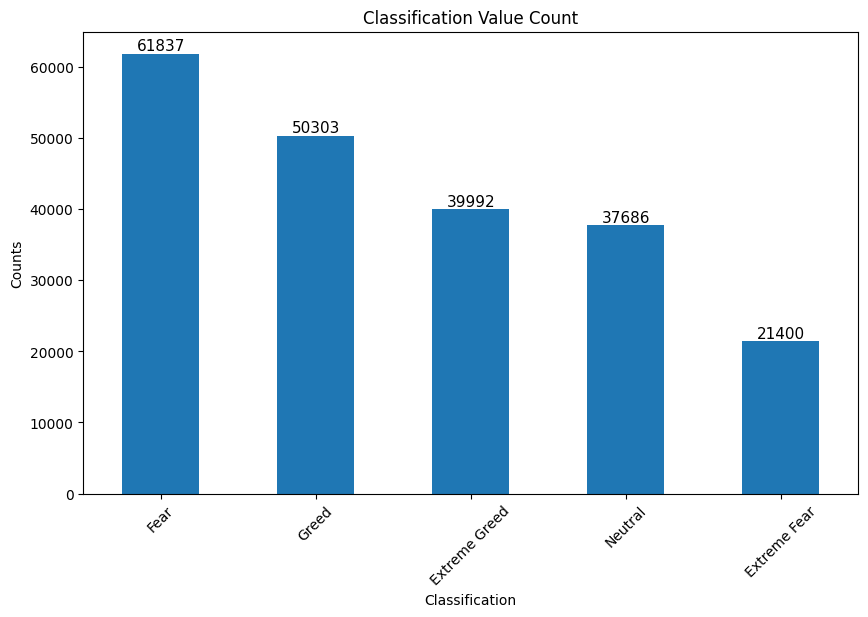

In [38]:
# how many trades in each mood

value_count = merged_df['classification'].value_counts()

plt.figure(figsize=(10,6))
value_count.plot(kind='bar')
plt.title('Classification Value Count')
plt.xlabel('Classification')
plt.ylabel('Counts')
plt.xticks(rotation=45)

for i, val in enumerate(value_count):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=11)

plt.show()


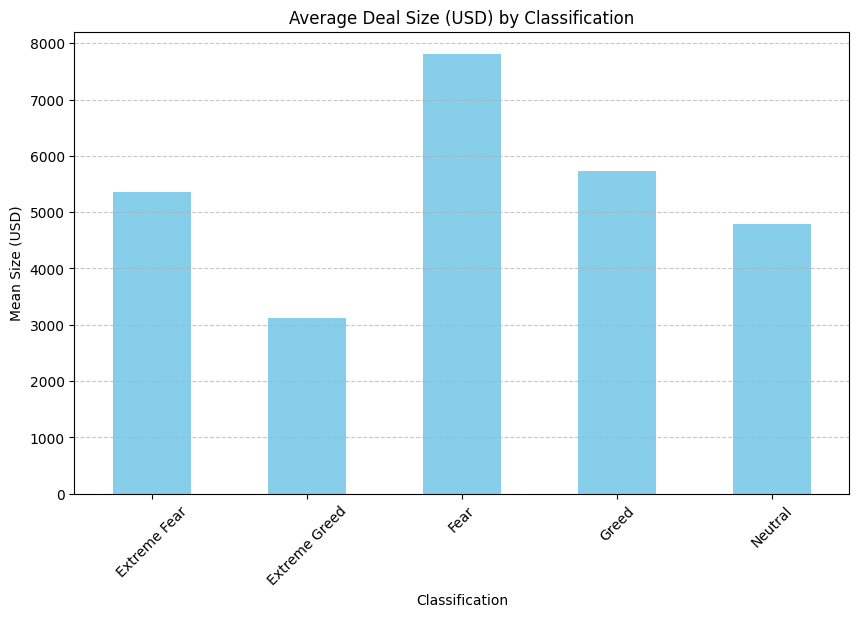

In [39]:
# what is average trade size in each mood

mean_sizes=merged_df.groupby('classification')['Size USD'].mean()

plt.figure(figsize=(10, 6))
mean_sizes.plot(kind='bar', color='skyblue')
plt.title('Average Deal Size (USD) by Classification')
plt.xlabel('Classification')
plt.ylabel('Mean Size (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<Figure size 1000x600 with 0 Axes>

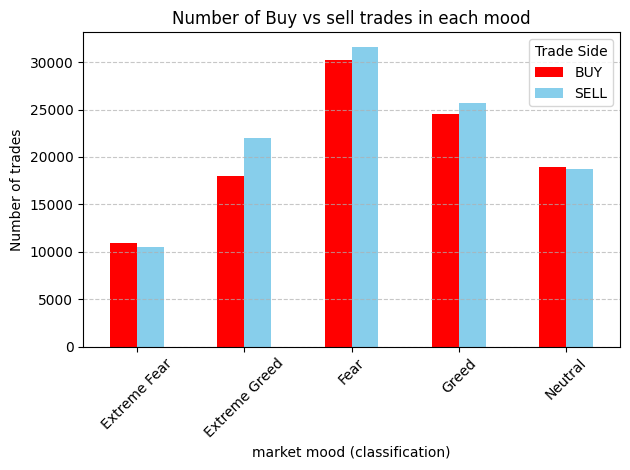

In [41]:
# Buy vs Sell trade in each mood

buy_sell_counts=merged_df.groupby(['classification','Side']).size().unstack()
plt.figure(figsize=(10,6))
buy_sell_counts.plot(kind='bar',stacked=False,color=['red','skyblue'])


plt.title('Number of Buy vs sell trades in each mood')
plt.xlabel('market mood (classification)')
plt.ylabel('Number of trades')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Trade Side')
plt.tight_layout()
plt.show()

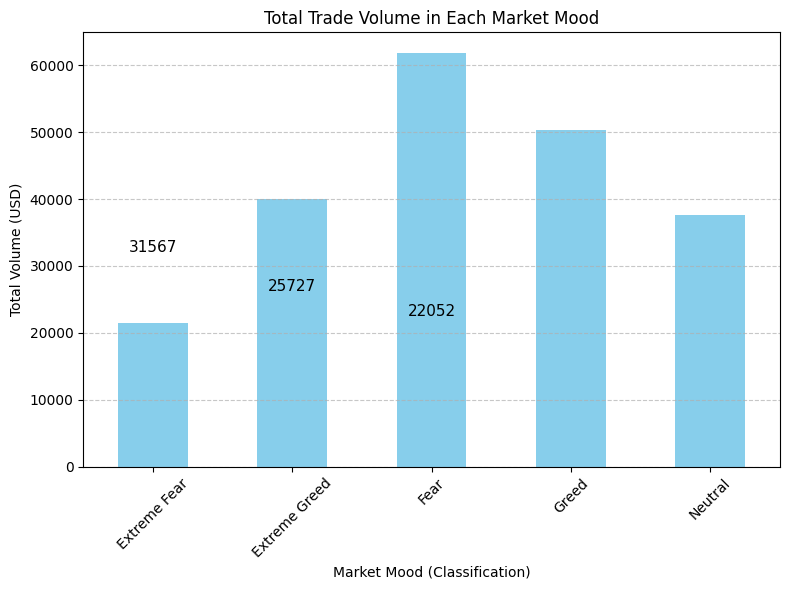

In [43]:
#total trade volume in each mood

total_volume_by_mood=merged_df.groupby('classification')['Size USD'].count()
plt.figure(figsize=(8, 6))
total_volume_by_mood.plot(kind='bar', color='skyblue')

plt.title('Total Trade Volume in Each Market Mood')
plt.xlabel('Market Mood (Classification)')
plt.ylabel('Total Volume (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

for i, val in enumerate(counts):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=11)


plt.show()

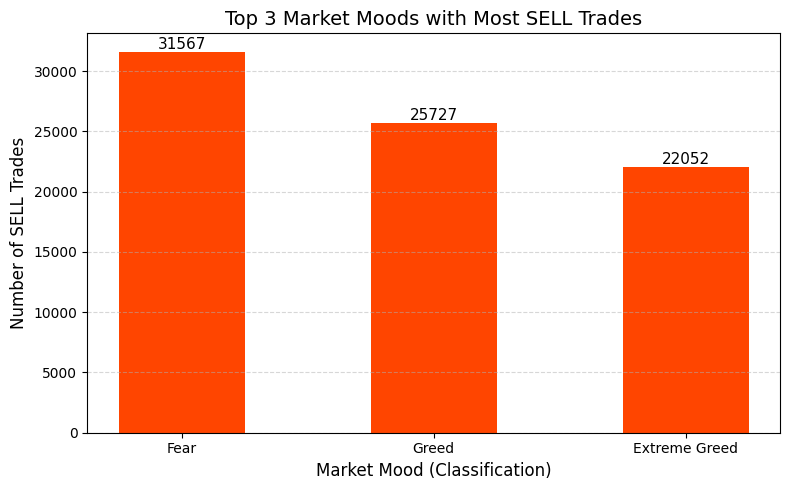

In [44]:
#Top 3 moods with most sell trade

top_sell_moods=merged_df[merged_df['Side']=='SELL'].groupby('classification').size().sort_values(ascending=False).head(3)


moods = top_sell_moods.index
counts = top_sell_moods.values


plt.figure(figsize=(8, 5))
plt.bar(moods, counts, color='orangered', width=0.5)


plt.title('Top 3 Market Moods with Most SELL Trades', fontsize=14)
plt.xlabel('Market Mood (Classification)', fontsize=12)
plt.ylabel('Number of SELL Trades', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)


for i, val in enumerate(counts):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()


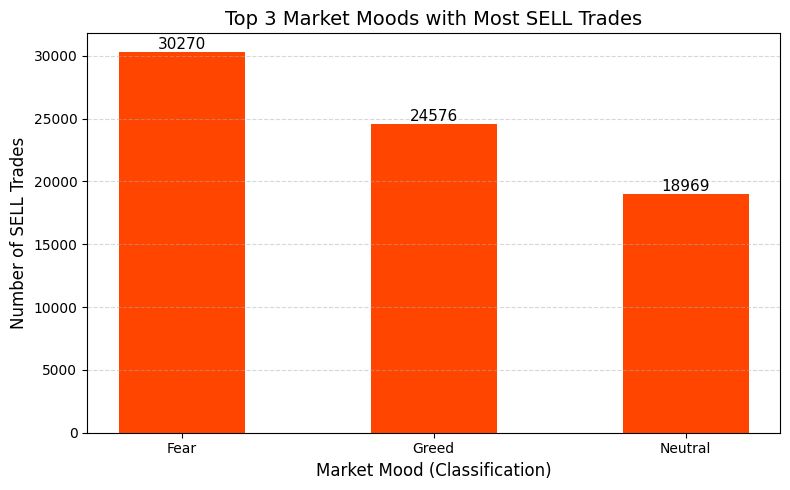

In [45]:
#Top 3 mood with most  buy trades

top_buy_moods=merged_df[merged_df['Side']=='BUY'].groupby('classification').size().sort_values(ascending=False).head(3)


moods = top_buy_moods.index
counts = top_buy_moods.values


plt.figure(figsize=(8, 5))
plt.bar(moods, counts, color='orangered', width=0.5)


plt.title('Top 3 Market Moods with Most SELL Trades', fontsize=14)
plt.xlabel('Market Mood (Classification)', fontsize=12)
plt.ylabel('Number of SELL Trades', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)


for i, val in enumerate(counts):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()



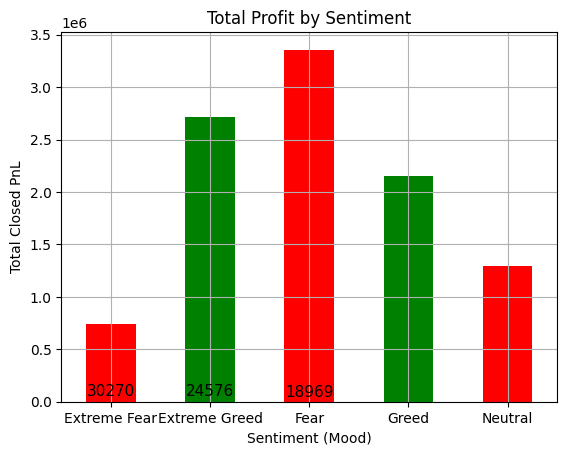

In [47]:
#Total Profit for Each Sentiment

profit_by_mood = merged_df.groupby('classification')['Closed PnL'].sum()


profit_by_mood.plot(kind='bar', color=['red', 'green'])
plt.title('Total Profit by Sentiment')
plt.xlabel('Sentiment (Mood)')
plt.ylabel('Total Closed PnL')
plt.xticks(rotation=0)
plt.grid(True)

for i, val in enumerate(counts):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=11)

plt.show()


/tmp/ipython-input-48-1104892940.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='classification', y='Closed PnL', data=merged_df, palette=['orange', 'limegreen'])
/tmp/ipython-input-48-1104892940.py:3: UserWarning: 
The palette list has fewer values (2) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x='classification', y='Closed PnL', data=merged_df, palette=['orange', 'limegreen'])


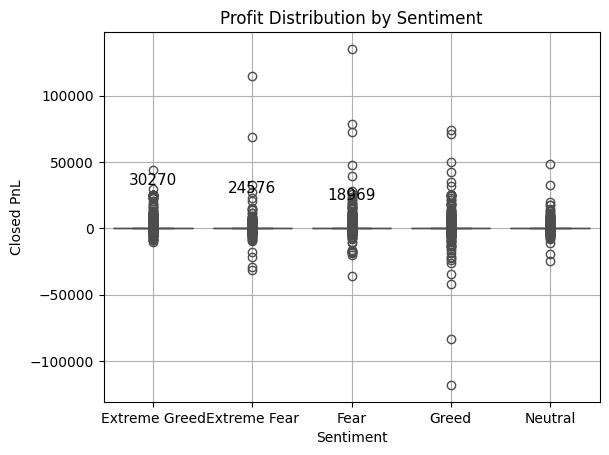

In [48]:
#Distribution of Profit for Each Sentiment

sns.boxplot(x='classification', y='Closed PnL', data=merged_df, palette=['orange', 'limegreen'])
plt.title('Profit Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Closed PnL')
plt.grid(True)

for i, val in enumerate(counts):
    plt.text(i, val + 5, str(val), ha='center', va='bottom', fontsize=11)
plt.show()


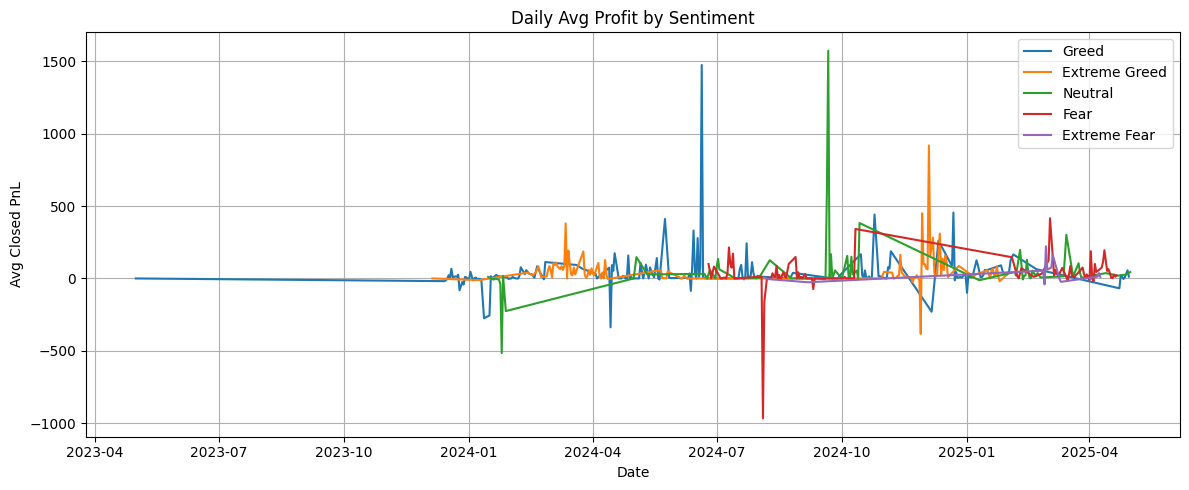

In [49]:
#Average Profit per Day for Each Sentiment

daily_avg_profit = merged_df.groupby(['date', 'classification'])['Closed PnL'].mean().reset_index()


plt.figure(figsize=(12, 5))
for mood in daily_avg_profit['classification'].unique():
    subset = daily_avg_profit[daily_avg_profit['classification'] == mood]
    plt.plot(subset['date'], subset['Closed PnL'], label=mood)

plt.title("Daily Avg Profit by Sentiment")
plt.xlabel("Date")
plt.ylabel("Avg Closed PnL")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: xlabel='Account'>

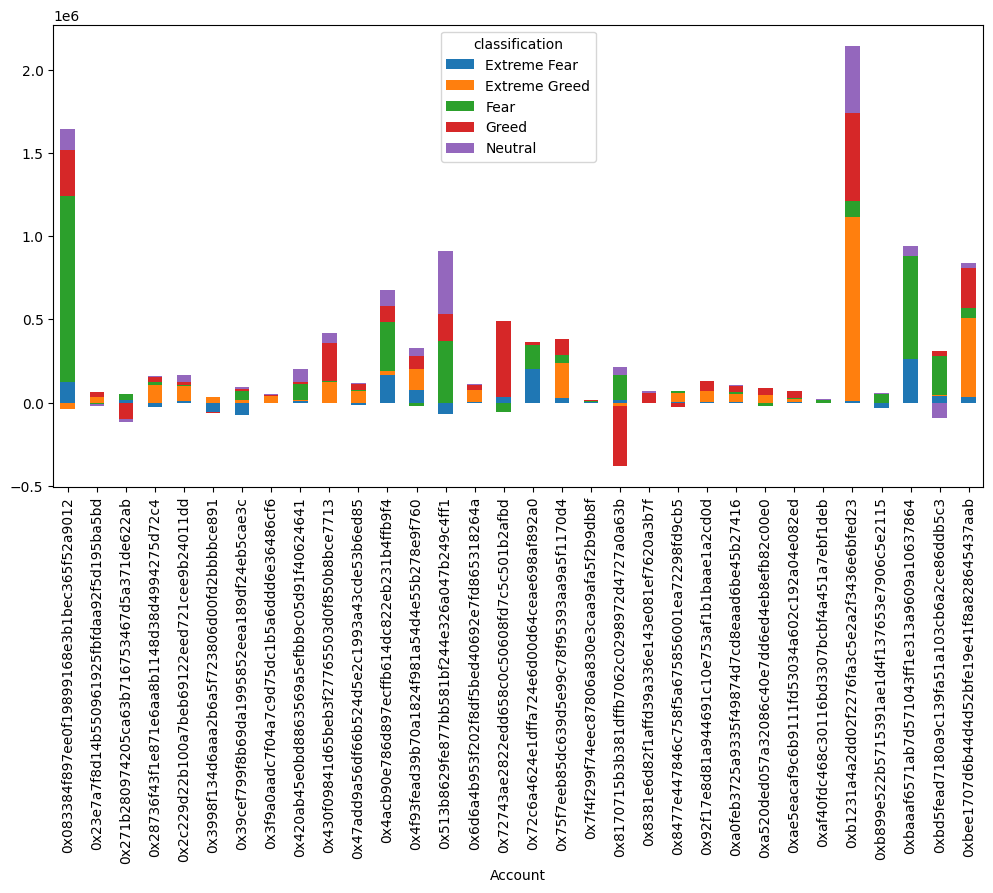

In [50]:
#Account-wise Analysis
#Which accounts perform well under Greed vs Fear?


account_sentiment_pnl = merged_df.groupby(['Account', 'classification'])['Closed PnL'].sum().unstack()
account_sentiment_pnl.plot(kind='bar', figsize=(12,6), stacked=True)


<Axes: title={'center': 'Daily Trade Volume by Sentiment'}, xlabel='date'>

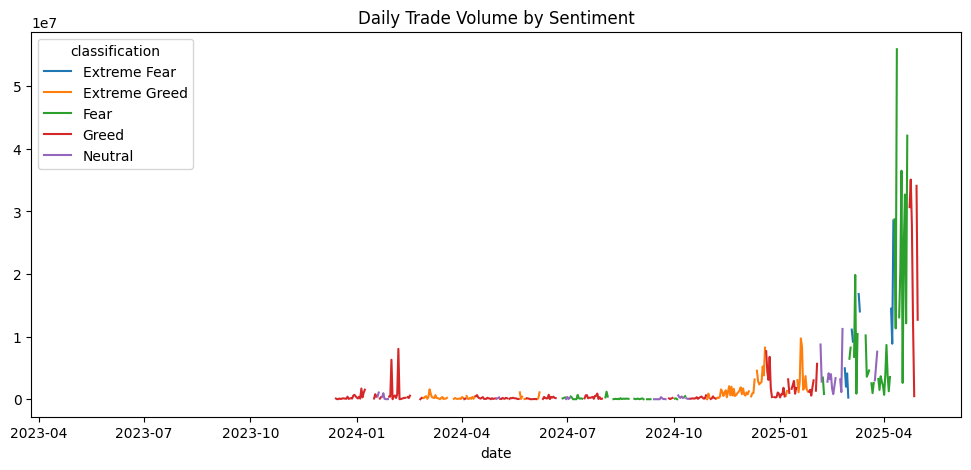

In [51]:
#Daily trade volume under each sentiment



daily_volume = merged_df.groupby(['date', 'classification'])['Size USD'].sum().unstack()
daily_volume.plot(figsize=(12,5), title="Daily Trade Volume by Sentiment")
